## Python Frontend
This notebook demonstrates the Python frontend to MPB.

In [9]:
%load_ext autoreload
%autoreload 2
from mpb import MPB, MultipleMPB
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
from copy import deepcopy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
mpb = MPB()

Any configuration values (or subtrees) can be set and retrieved using the bracket operator on the `MPB` instance. The key is a string and by using the dot-notation, a path can be given:

In [11]:
mpb["ompl.seed"] = 5  # set the seed of the OMPL planners

Some helper functions are available to set environment properties, and configure the planners, steer functions and post smoothers:

In [15]:
folder_prefix = "/home/ksatyaki/workspace/bench_ws/src/bench-mr/"
mpb.set_image_yaml_env(folder_prefix + "maps/atc.yaml")
mpb.set_planners(['rrt_star'])

#start: {x: 47.690, y: -18.848, theta: -2.356}
#goal: {x: -19.575, y: 12.390, theta: 2.313}
mpb.set_start(47.690, -18.848, -2.356)
mpb.set_goal(-19.575, 12.390, 2.313)
mpb.set_steer_functions(['car'])

cost_fn = 'gmmt'

mpb["env.collision.robot_shape_source"] = folder_prefix + "maps/simple_robot.yaml"
mpb["steer.car_turning_radius"] = 0.5
mpb["steer.sampling_resolution"] = 0.01

mpb["ompl.sampler"] = "intensity"
mpb.set_id("intensity-{}".format(cost_fn))
mpb["ompl.intensity_map_file_name"] = folder_prefix + "maps/atc_intensity1m.xml"
mpb["ompl.optimization_objective"] = cost_fn
mpb["mod.mod_file_name"] = folder_prefix + "maps/atc_gmmt.xml"
mpb["max_planning_time"] = 3

mpb_uniform = deepcopy(mpb)
mpb_uniform.set_id("uniform-{}".format(cost_fn))
mpb_uniform["ompl.sampler"] = "iid"
pool = MultipleMPB()
pool.benchmarks.append(mpb)
pool.benchmarks.append(mpb_uniform)

Run the motion planning benchmark:

In [20]:
pool.run_parallel(runs=10, id='{}-intensity-vs-uniform'.format(cost_fn), show_plot=False)
pool.merge('{}-intensity-vs-uniform/{}-intensity-vs-uniform.json'.format(cost_fn, cost_fn), plan_names=['RRT* (uniform-{})'.format(cost_fn), 'RRT* (intensity-{})'.format(cost_fn)])

Available memory: 6.72 GB, limiting each MPB process to 41.7% usage (2.80 GB).
Creating pool of 2 processes.
Running MPB with ID intensity-gmmt (log file at gmmt-intensity-vs-uniform/intensity-gmmt.log)...
Running MPB with ID uniform-gmmt (log file at gmmt-intensity-vs-uniform/uniform-gmmt.log)...


uniform-gmmt:   0%|          | 0/10 [00:00<?, ?it/s]

intensity-gmmt:   0%|          | 0/10 [00:00<?, ?it/s]

Benchmark 1 (uniform-gmmt) finished successfully.
Benchmark 0 (intensity-gmmt) finished successfully.
All benchmarks succeeded.
Successfully merged [gmmt-intensity-vs-uniform/intensity-gmmt_results.json, gmmt-intensity-vs-uniform/uniform-gmmt_results.json] into gmmt-intensity-vs-uniform/gmmt-intensity-vs-uniform.json.


Visualize the planner trajectories:

Visualizing gmmt-intensity-vs-uniform/gmmt-intensity-vs-uniform.json
Saved MoD-planning-paths.pdf.


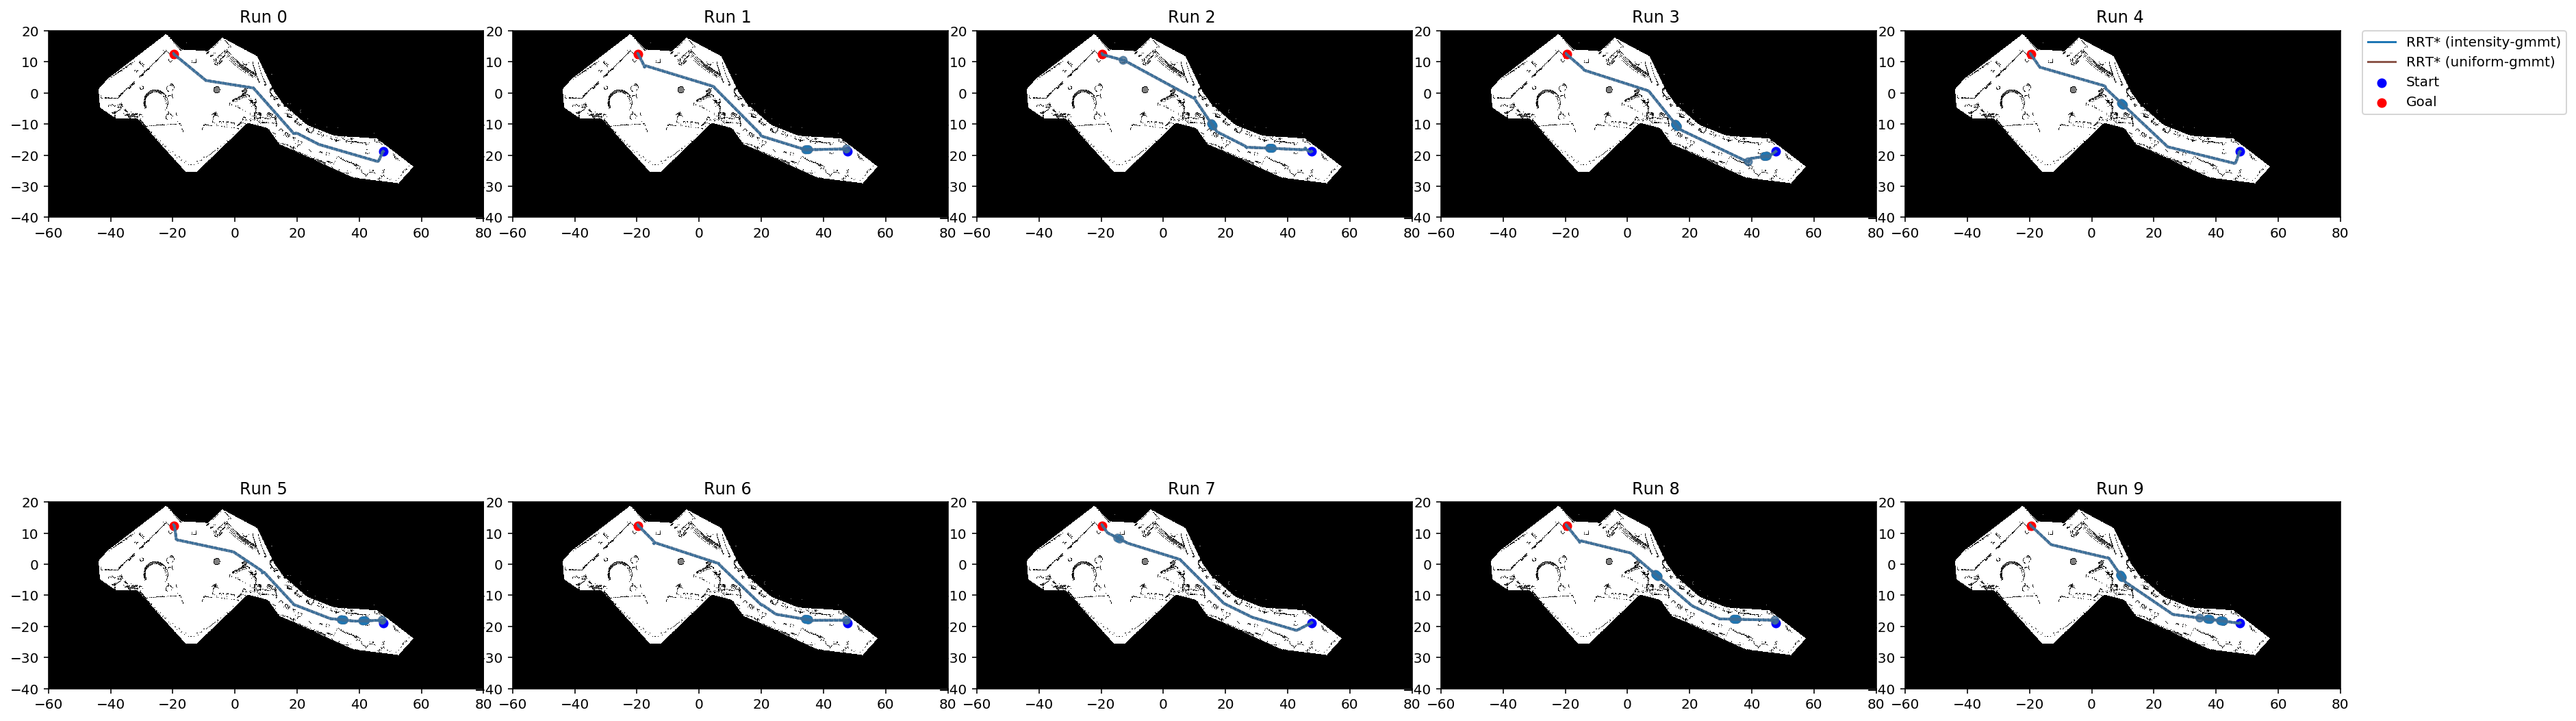

In [21]:
from trajectory import visualize
visualize('{}-intensity-vs-uniform/{}-intensity-vs-uniform.json'.format(cost_fn, cost_fn), save_file="MoD-planning-paths.pdf")

Plot planner statistics:

Visualizing gmmt-intensity-vs-uniform/gmmt-intensity-vs-uniform.json...


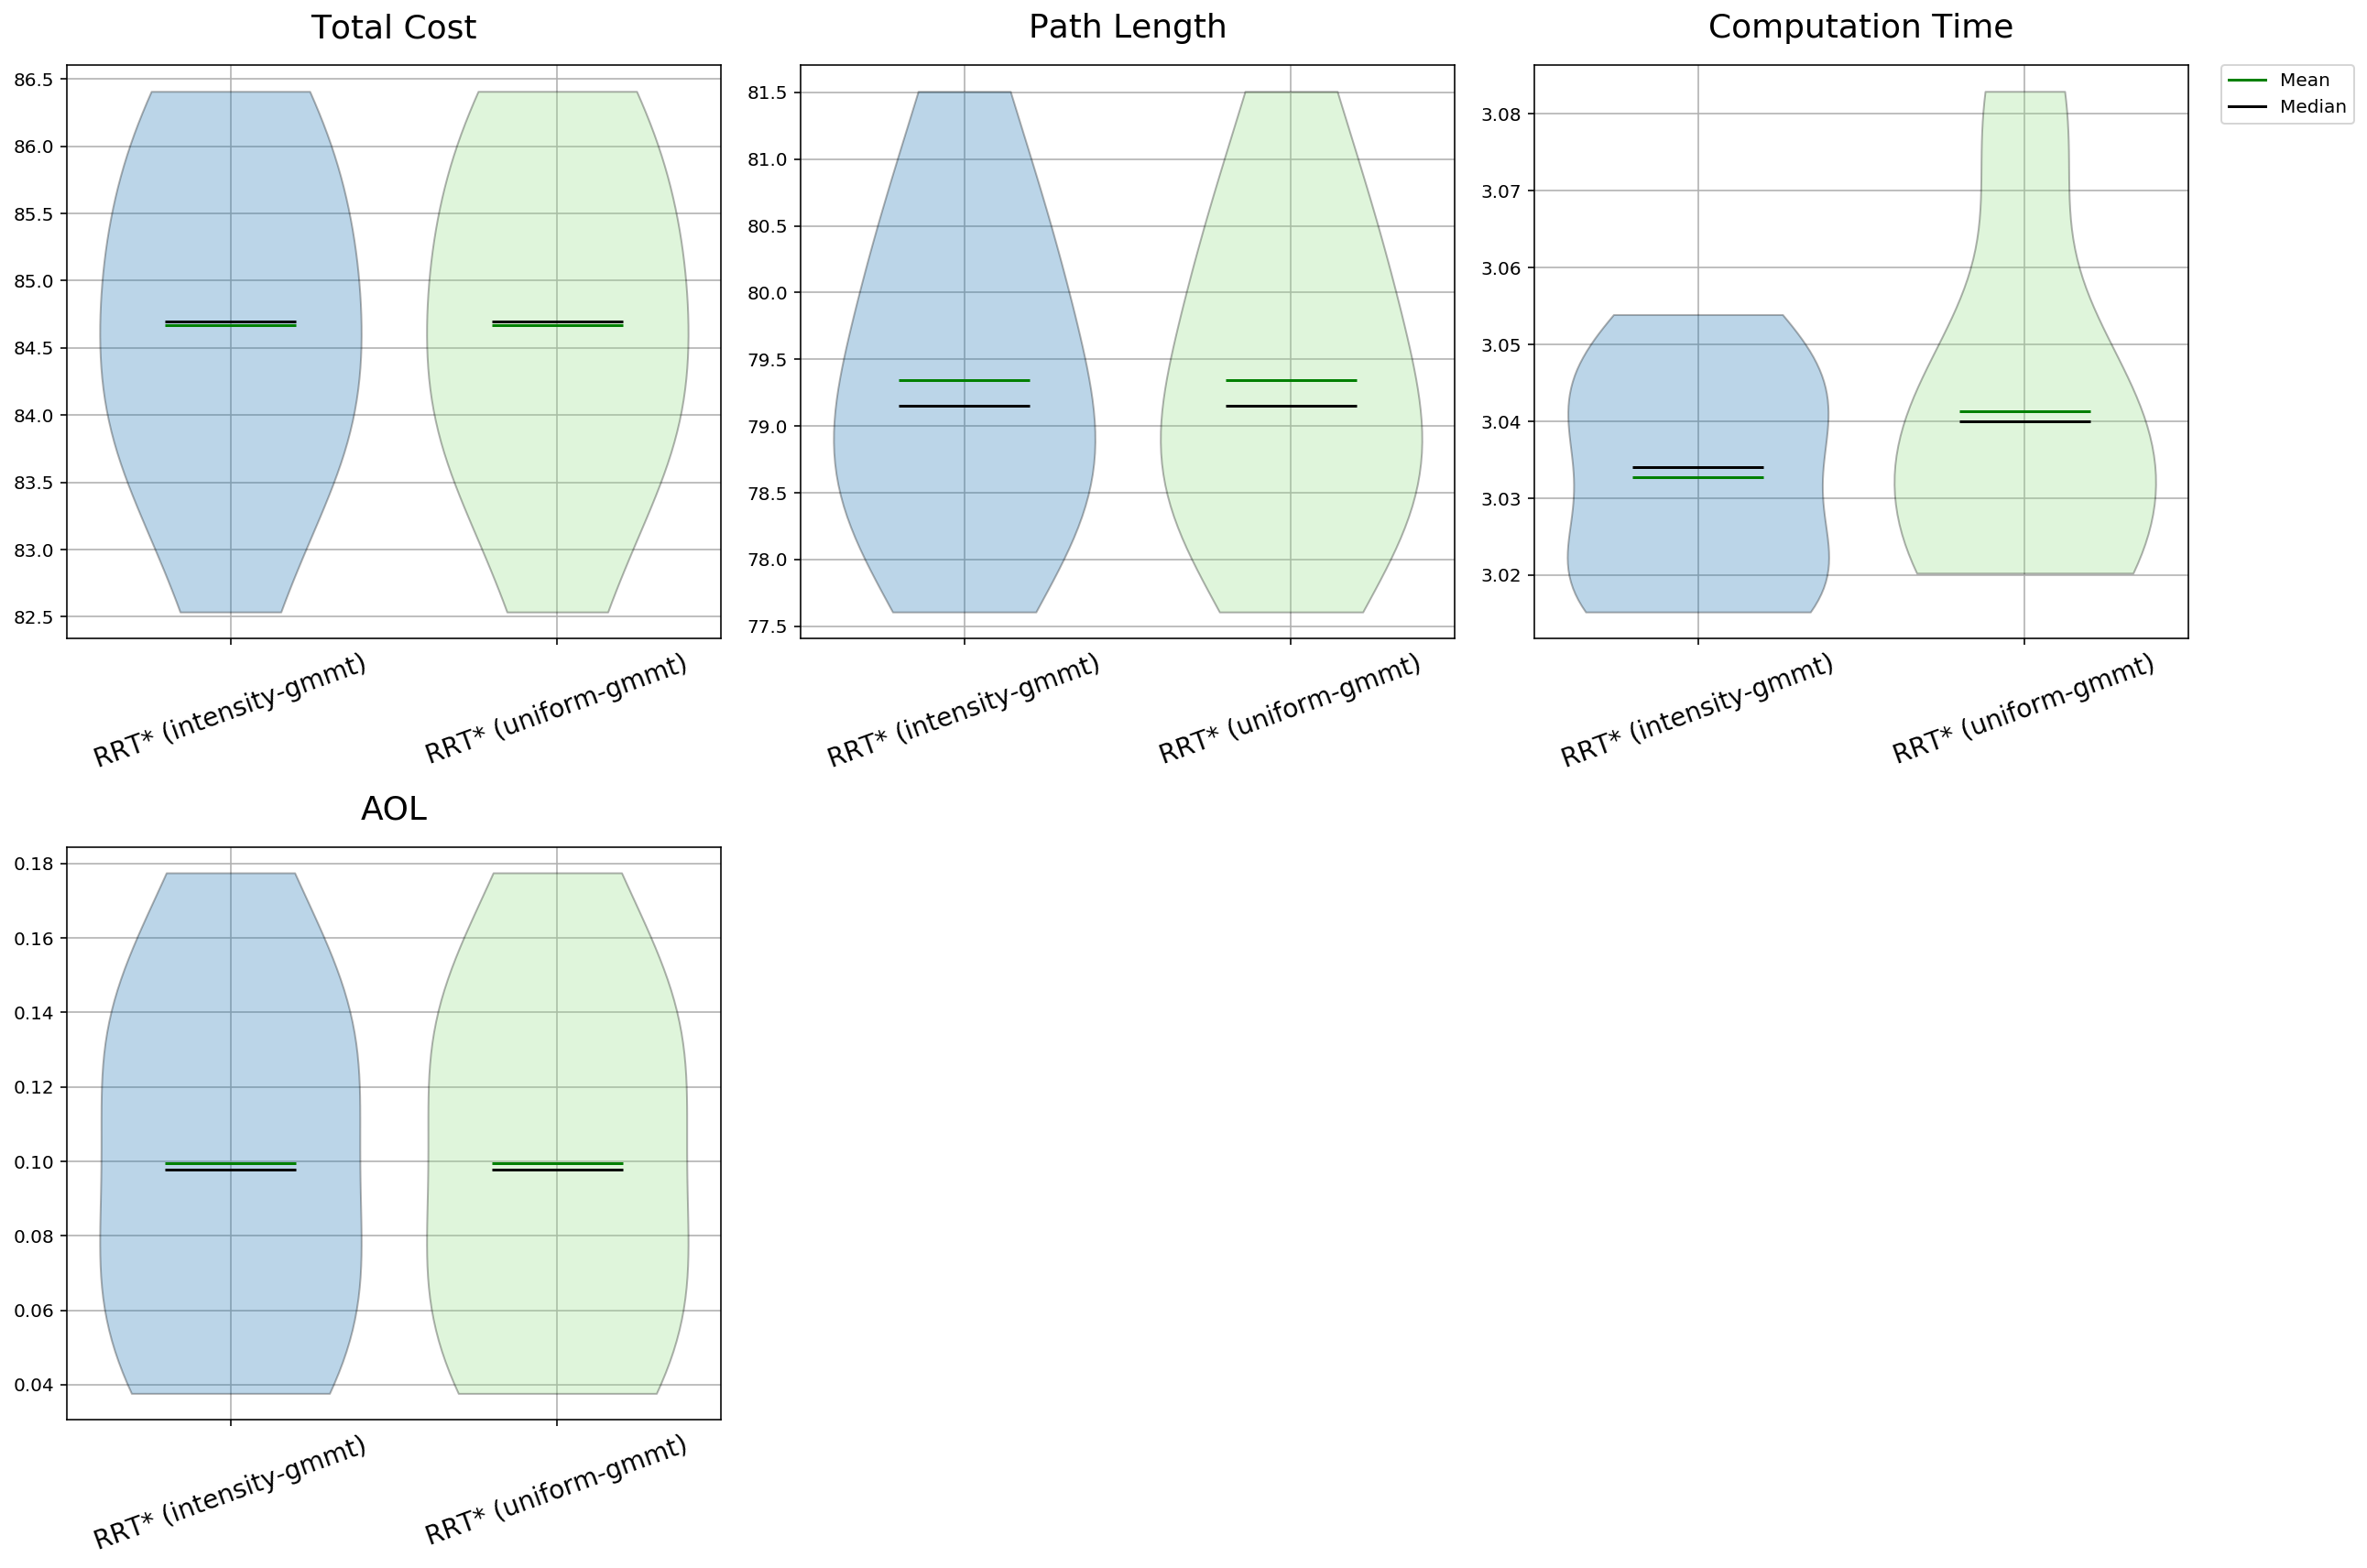

In [22]:
from plot_stats import plot_planner_stats

plot_planner_stats('{}-intensity-vs-uniform/{}-intensity-vs-uniform.json'.format(cost_fn, cost_fn), metrics='total_cost,path_length,planning_time,aol', num_colors=4, ticks_rotation=20)